In [2]:
import lightworks as lw
from lightworks import emulator
import numpy as np

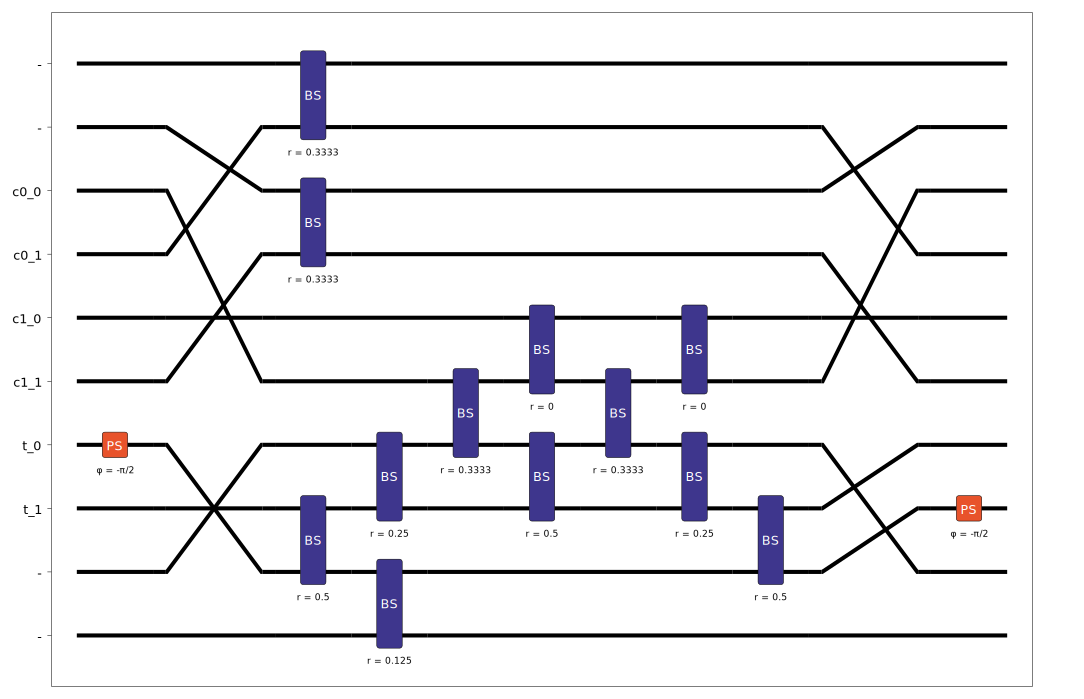

In [3]:
circ = lw.Circuit(10)

circ.add_ps(6,-np.pi/2)

circ.add_mode_swaps({2:5, 3:1, 4:4, 5:3, 1:2, 6:8, 8:6})

circ.add_barrier()

circ.add_bs(0, reflectivity = 1/3)
circ.add_bs(2, reflectivity = 1/3)

circ.add_bs(7, reflectivity = 1/2)
circ.add_bs(6, reflectivity = 1/4)
circ.add_bs(5, reflectivity = 1/3)

circ.add_bs(8, reflectivity = 1/8)

circ.add_bs(4, reflectivity = 0)
circ.add_bs(6, reflectivity = 1/2)
circ.add_bs(5, reflectivity = 1/3)

circ.add_bs(4, reflectivity = 0)
circ.add_bs(6, reflectivity = 1/4)

circ.add_bs(7, reflectivity = 1/2)

circ.add_barrier()

circ.add_mode_swaps({5:2, 1:3, 4:4, 3:5, 2:1, 8:7, 7:6, 6:8})

circ.add_ps(7,-np.pi/2)

circ.display(mode_labels=["-","-","c0_0","c0_1","c1_0","c1_1","t_0","t_1","-","-",])

In [4]:
sampler = emulator.Sampler(circ, lw.State([0,0,0,1,0,1,0,1,0,0]))

herald = lambda s: (not s[0]+s[1]+s[8]+s[9] and s[2] + s[3] == 1 and 
                    s[4] + s[5] == 1 and s[6] + s[7] == 1)

results = sampler.sample_N_outputs(1000, herald = herald)

print(results)

{State(|0,0,0,1,0,1,1,0,0,0>): 1000}


In [5]:
sim = emulator.Simulator(circ)

states = [
    [0,0,1,0,1,0,1,0,0,0],
    [0,0,1,0,0,1,1,0,0,0],
    [0,0,0,1,1,0,1,0,0,0],
    [0,0,0,1,0,1,1,0,0,0],
    [0,0,1,0,1,0,0,1,0,0],
    [0,0,1,0,0,1,0,1,0,0],
    [0,0,0,1,1,0,0,1,0,0],
    [0,0,0,1,0,1,0,1,0,0],
    ]

states = [lw.State(s) for s in states]

results = sim.simulate(states, states)

results.print_outputs()

|0,0,1,0,1,0,1,0,0,0> -> (0.1179+0j)*|0,0,1,0,1,0,1,0,0,0> 
|0,0,1,0,0,1,1,0,0,0> -> (-0.1179-0j)*|0,0,1,0,0,1,1,0,0,0> 
|0,0,0,1,1,0,1,0,0,0> -> (-0.1179-0j)*|0,0,0,1,1,0,1,0,0,0> 
|0,0,0,1,0,1,1,0,0,0> -> (-0.1179-0j)*|0,0,0,1,0,1,0,1,0,0> 
|0,0,1,0,1,0,0,1,0,0> -> (0.1179+0j)*|0,0,1,0,1,0,0,1,0,0> 
|0,0,1,0,0,1,0,1,0,0> -> (-0.1179-0j)*|0,0,1,0,0,1,0,1,0,0> 
|0,0,0,1,1,0,0,1,0,0> -> (-0.1179-0j)*|0,0,0,1,1,0,0,1,0,0> 
|0,0,0,1,0,1,0,1,0,0> -> (-0.1179+0j)*|0,0,0,1,0,1,1,0,0,0> 


In [6]:
a = [[ 3**-0.5, 0, 0, 1j*(2/3)**0.5, 0, 0, 0, 0, 0, 0],
     [ 0,  3**-0.5, 0, 0, 0, 1j*(2/3)**0.5, 0, 0, 0, 0],
     [ 0, 0, - 3**-0.5, 0, 0, 0, 0.5, 0.5j, -1j*6**-0.5, 0],
     [1j*(2/3)**0.5, 0, 0,  3**-0.5, 0, 0, 0, 0, 0, 0],
     [ 0, 0, -1j*2**0.5/3, 0, - 3**-0.5, 0, -1j*6**-0.5, 6**-0.5, 1/3, 0],
     [ 0, 1j*(2/3)**0.5, 0, 0, 0,  3**-0.5, 0, 0, 0, 0],
     [ 0, 0, -1j*6**-0.5, 0, 0.5, 0, 0,  2**-1.5, -48**-0.5, 1j*(7/16)**0.5],
     [ 0, 0, -6**-0.5, 0, -0.5j, 0, - 2**-1.5, 0, 1j*48**-0.5, -(7/16)**0.5],
     [ 0, 0, -1j/3, 0, -6**-0.5, 0, 1j*48**-0.5, -48**-0.5, -7*72**-0.5, 0],
     [ 0, 0, 0, 0, 0, 0, -(7/16)**0.5, 1j*(7/16)**0.5, 0,  2**-1.5]]

import numpy as np
a = np.array(a, dtype=complex)

circ = lw.Unitary(a)

In [7]:
(a.round(3) == circ.U.round(3)).all()

True

In [8]:
sampler = emulator.Sampler(circ, lw.State([0,0,0,1,0,1,1,0,0,0]))

herald = lambda s: (not s[0]+s[1]+s[8]+s[9] and s[2] + s[3] == 1 and 
                    s[4] + s[5] == 1 and s[6] + s[7] == 1)

results = sampler.sample_N_outputs(1000, herald = herald)

print(results)


{State(|0,0,0,1,0,1,0,1,0,0>): 1000}
